In [1]:
%load_ext autoreload
%autoreload 2

Total amount of samples: 2324
Got 5 samples for m.
Avg peaks prediction: 1.8949301263389675m
Avg mlp prediction: nanm


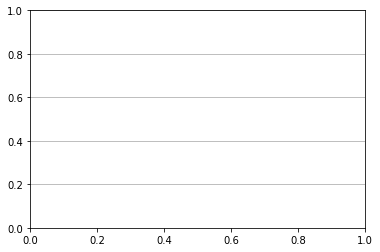

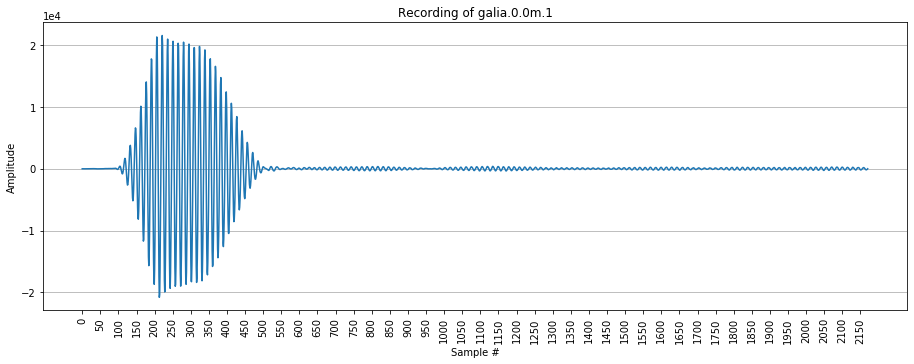

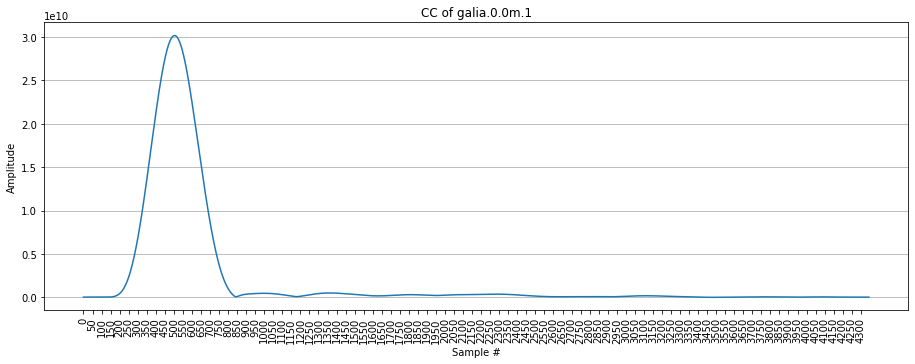

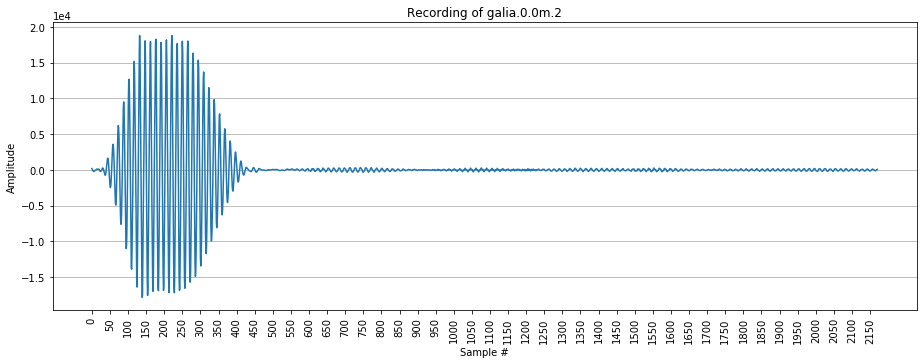

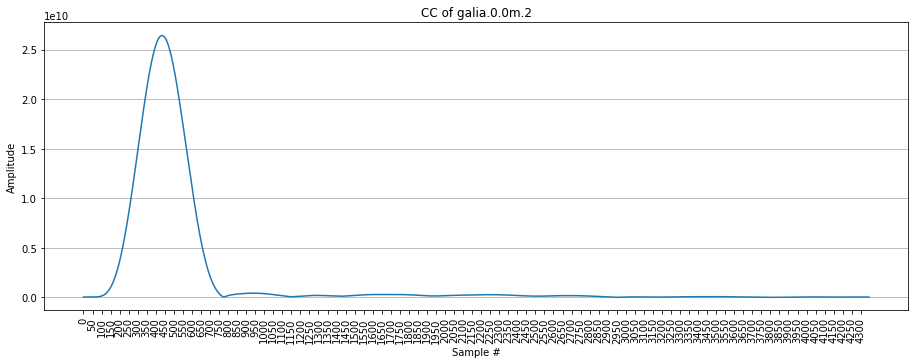

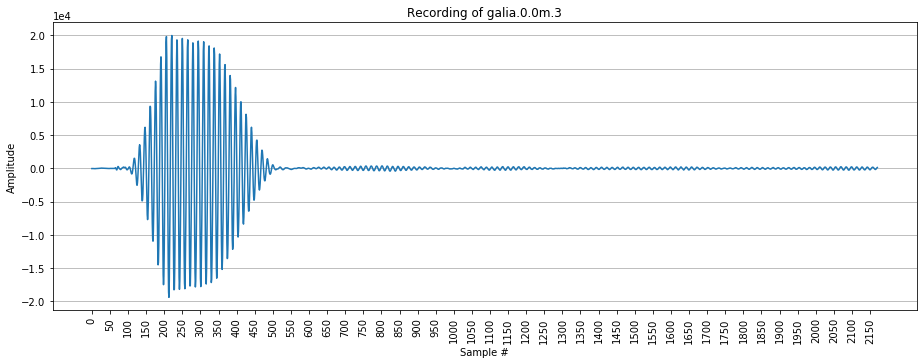

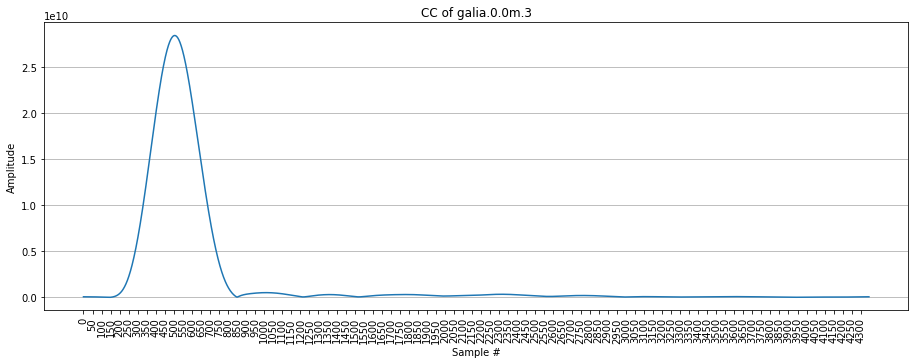

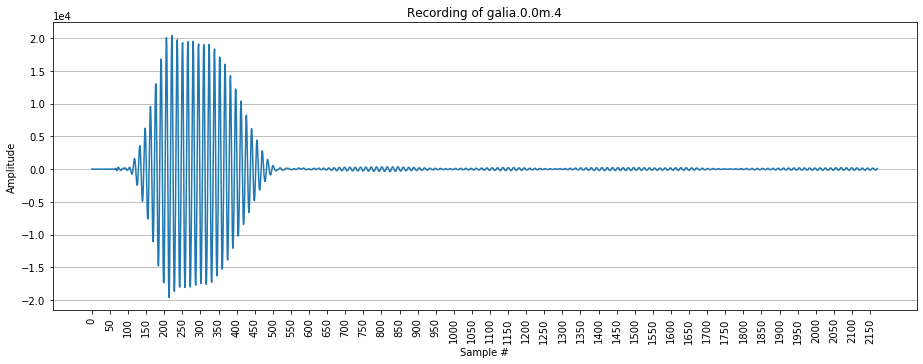

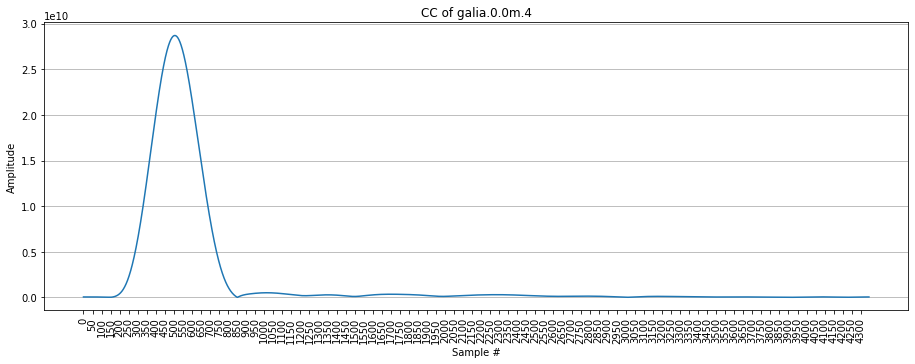

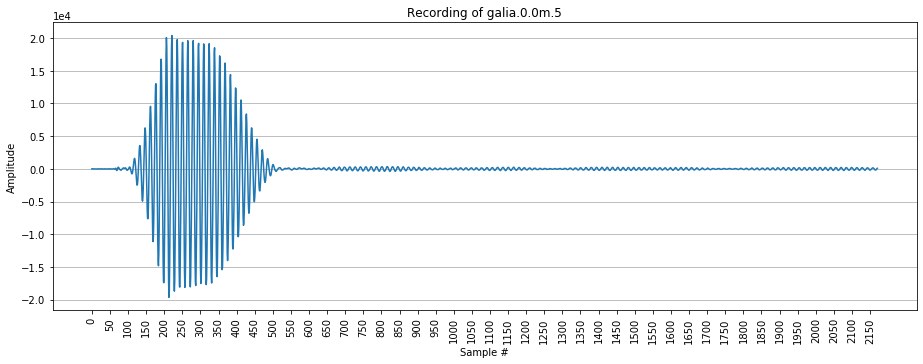

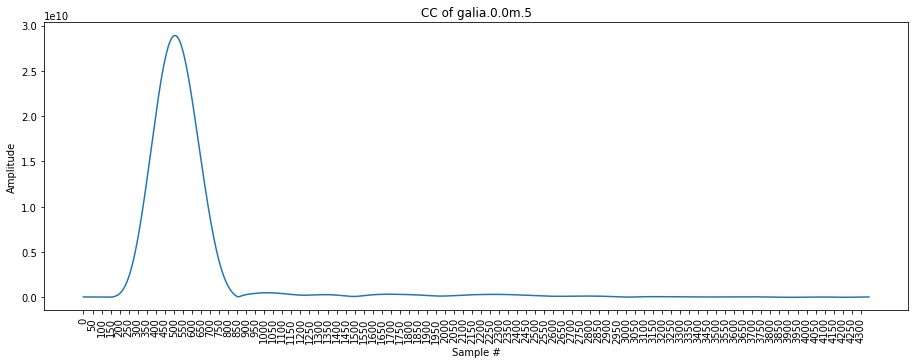

In [3]:
%matplotlib inline

import os
import json
import analysis
import numpy as np

DISTANCE = ''
LOCATION = 'galia'
separator = ''.join(['x']*50)

all_files = os.listdir(analysis.SAMPLES_DIR)
print("Total amount of samples: {0}".format(len(all_files)))
filenames = [f_name for f_name in all_files 
             if DISTANCE in f_name and LOCATION in f_name]
filenames = sorted(filenames)
print("Got {0} samples for {1}m.".format(len(filenames), DISTANCE))
peaks_predictions = []
mlp_predictions = []
for filename in filenames:
    with open(os.path.join(analysis.SAMPLES_DIR, filename), 'r') as f:
#         print(separator)
        sample = json.load(f)
        recording_name = '{0}.{1}.{2}'.format(
            sample['location'], sample['real_distance'], sample['cycle'])
        analysis.get_graph_figure(analysis.trim(sample['recording']), 'Recording of '
                                  '{0}'.format(recording_name))
        analysis.get_graph_figure(sample['cc'], 'CC of '
                                  '{0}'.format(recording_name))
        peaks_prediction = sample['peaks_prediction']
        mlp_prediction = sample['mlp_prediction']
#         print("Peaks prediction: {0}".format(peaks_prediction))
#         print("MLP prediction: {0}".format(mlp_prediction))
        if peaks_prediction > 0:
            peaks_predictions.append(peaks_prediction)
        if mlp_prediction > 0:
            mlp_predictions.append(mlp_prediction)
print("Avg peaks prediction: {}m".format(np.mean(peaks_predictions)))
print("Avg mlp prediction: {}m".format(np.mean(mlp_predictions)))